In [1]:
import pandas as pd
import datetime

In [4]:
nflx = pd.read_csv("/content/drive/MyDrive/Work Samples/Netflix /NFLX.csv")
nflx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


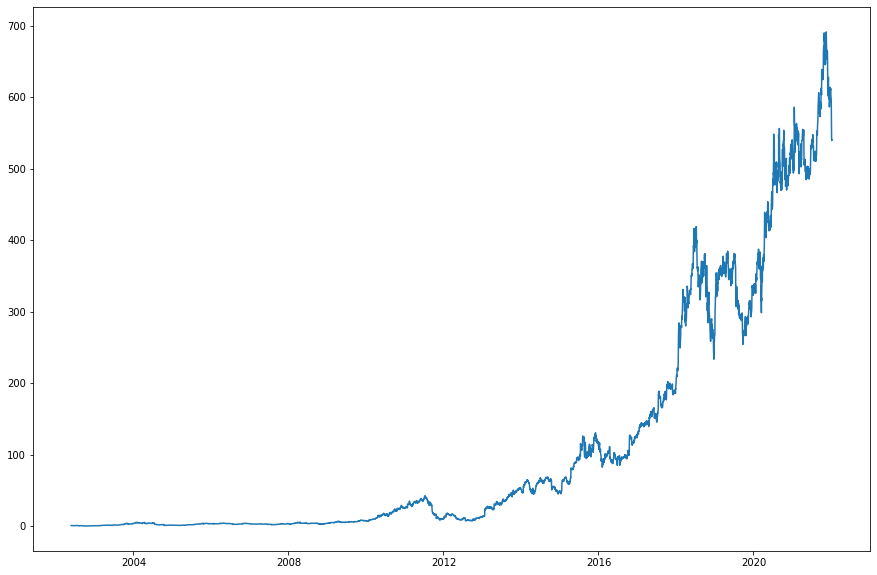

In [5]:
nflx['Date'] = pd.DatetimeIndex(nflx['Date'])

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(nflx["Date"], nflx["Close"])

In [6]:
nflx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4945 non-null   datetime64[ns]
 1   Open       4945 non-null   float64       
 2   High       4945 non-null   float64       
 3   Low        4945 non-null   float64       
 4   Close      4945 non-null   float64       
 5   Adj Close  4945 non-null   float64       
 6   Volume     4945 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 270.6 KB


In [7]:
nflx = nflx[["Date", "Open", "Close", "Volume"]]
nflx.head()

,Date,Open,Close,Volume
0,2002-05-23,1.156429,1.196429,104790000
1,2002-05-24,1.214286,1.210000,11104800
2,2002-05-28,1.213571,1.157143,6609400
3,2002-05-29,1.164286,1.103571,6757800
4,2002-05-30,1.107857,1.071429,10154200


In [8]:
data = nflx.filter(["Close"])
dataset = data.values
dataset

array([[  1.196429],
       [  1.21    ],
       [  1.157143],
       ...,
       [541.059998],
       [539.849976],
       [540.840027]])

In [9]:
import math

training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

3956

**Approach 1**

*   Predicting values consecutively

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00119131],
       [0.00121094],
       [0.00113448],
       ...,
       [0.78211157],
       [0.78036126],
       [0.78179338]])

In [11]:
train_data = scaled_data[0:training_data_len, :]
len(train_data)

3956

In [12]:
X_train, y_train = [],[]
for i in range(50, len(train_data)):
    X_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])
    if i<=51:
        print(X_train)
        print(y_train)

[array([0.00119131, 0.00121094, 0.00113448, 0.00105699, 0.00101049,
       0.00101773, 0.00109315, 0.00107765, 0.00112002, 0.00117064,
       0.00107869, 0.00113345, 0.00112931, 0.00104149, 0.00102703,
       0.00088754, 0.00079455, 0.00077802, 0.00083691, 0.00084518,
       0.00087721, 0.00087617, 0.00085551, 0.00089064, 0.00082555,
       0.00090614, 0.00094747, 0.00115721, 0.00121714, 0.00130703,
       0.00116134, 0.00113965, 0.00114378, 0.0012967 , 0.00120784,
       0.00111382, 0.00109005, 0.00103632, 0.00112312, 0.00113861,
       0.00115411, 0.00111898, 0.00107249, 0.00095987, 0.00072119,
       0.00072842, 0.00078318, 0.00084001, 0.00075012, 0.00058584])]
[0.0005817055209877659]
[array([0.00119131, 0.00121094, 0.00113448, 0.00105699, 0.00101049,
       0.00101773, 0.00109315, 0.00107765, 0.00112002, 0.00117064,
       0.00107869, 0.00113345, 0.00112931, 0.00104149, 0.00102703,
       0.00088754, 0.00079455, 0.00077802, 0.00083691, 0.00084518,
       0.00087721, 0.00087617, 0.0

In [14]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(3906, 50, 1)

In [75]:
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM

# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(25, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.compile(optimizer = "adam", loss="mean_squared_error")

In [76]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer = "adam", loss="mean_squared_error")

In [77]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

3906/3906 [==============================] - 36s 9ms/step - loss: 2.5508e-04


In [78]:
test_data = scaled_data[training_data_len-50:, :]
X_test = []
y_test = dataset[training_data_len:,:]

In [79]:
for i in range(50, len(test_data)):
    X_test.append(test_data[i-50:i,0])

In [80]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [81]:
predictions = model.predict(X_test)

In [82]:
predictions = scaler.inverse_transform(predictions)

In [83]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions, y_test)
mse

1445.1126728385718

In [84]:
rmse = np.sqrt(mse)
rmse

38.01463761287975

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


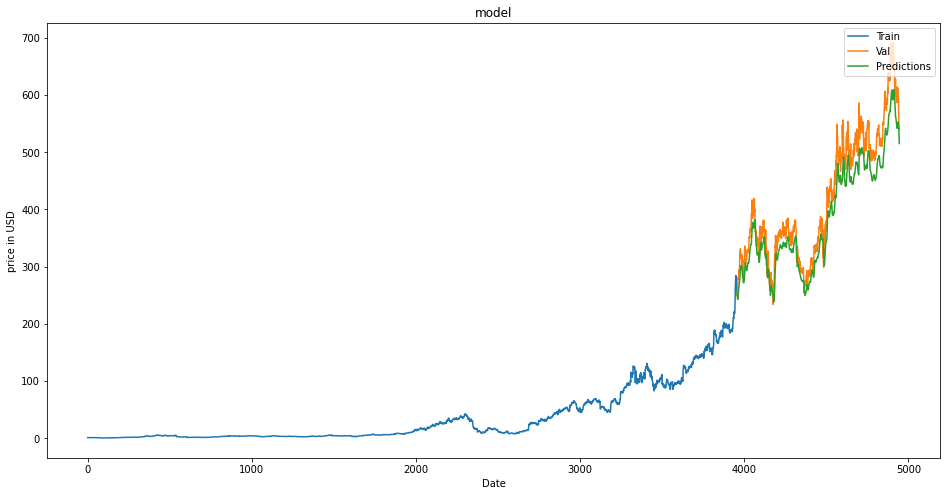

In [85]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["predictions"] = predictions
plt.figure(figsize=(16,8))
plt.title("model")
plt.xlabel("Date")
plt.ylabel("price in USD")
plt.plot(train.Close)
plt.plot(valid[["Close", "predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="upper right")
plt.show()

**Approach 2**

*   Predicting 10 values consecutively

In [27]:
# model2 = Sequential()
# model2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
# model2.add(Dropout(0.2))
# model2.add(LSTM(50, return_sequences=True))
# model2.add(Dropout(0.2))
# model2.add(LSTM(25, return_sequences=False))
# model2.add(Dropout(0.2))
# model2.add(Dense(10))
# model2.compile(optimizer = "adam", loss="mean_squared_error")

In [86]:
model2 = Sequential()
model2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model2.add(Dropout(0.2))
model2.add(LSTM(128, return_sequences=False))
model2.add(Dropout(0.2))
model2.add(Dense(10))
model2.add(Activation('linear'))
model2.compile(optimizer = "adam", loss="mean_squared_error")

In [87]:
model2.fit(X_train, y_train, batch_size=1, epochs=1)

3906/3906 [==============================] - 35s 8ms/step - loss: 2.6509e-04


In [88]:
test_data = scaled_data[training_data_len-50:, :]
X_test = []
y_test = dataset[training_data_len:,:]

for i in range(50, len(test_data)):
    X_test.append(test_data[i-50:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [89]:
predictions = model2.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:, -1]

In [90]:
y_test.shape

(989, 1)

In [91]:
predictions.shape

(989,)

In [92]:
mse = mean_squared_error(predictions, y_test)
mse

1025.8079038899

In [93]:
rmse = np.sqrt(mse)
rmse

32.028236040873374

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


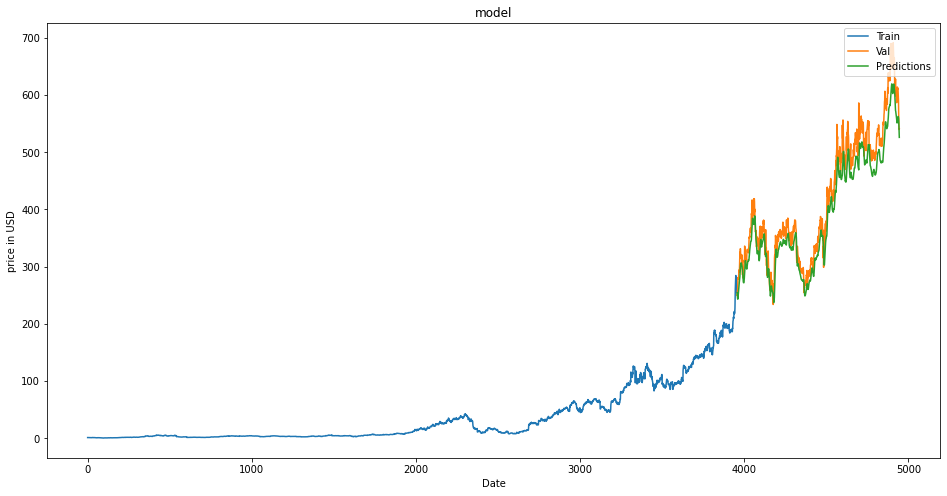

In [94]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["predictions"] = predictions
plt.figure(figsize=(16,8))
plt.title("model")
plt.xlabel("Date")
plt.ylabel("price in USD")
plt.plot(train.Close)
plt.plot(valid[["Close", "predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="upper right")
plt.show()

**Approach 3**

*   Using time distributed layer (sequence to sequence modelling)

In [95]:
from keras.layers import TimeDistributed

# model3 = Sequential()
# model3.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
# model3.add(Dropout(0.2))
# model3.add(LSTM(50, return_sequences=True))
# model3.add(Dropout(0.2))
# model3.add(LSTM(25, return_sequences=True))
# model3.add(Dropout(0.2))
# model3.add(TimeDistributed(Dense(1)))

# model3.compile(optimizer = "adam", loss="mean_squared_error")

# model3.fit(X_train, y_train, batch_size=1, epochs=1)

3906/3906 [==============================] - 42s 10ms/step - loss: 5.0584e-04


In [99]:
model3 = Sequential()
model3.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model3.add(Dropout(0.2))
model3.add(LSTM(128, return_sequences=True))
model3.add(Dropout(0.2))
model3.add(TimeDistributed(Dense(1)))
model3.add(Activation('linear'))
model3.compile(optimizer = "adam", loss="mean_squared_error")

model3.fit(X_train, y_train, batch_size=1, epochs=1)

3906/3906 [==============================] - 29s 7ms/step - loss: 4.0162e-04


In [100]:
test_data = scaled_data[training_data_len-50:, :]
X_test = []
y_test = dataset[training_data_len:,:]

for i in range(50, len(test_data)):
    X_test.append(test_data[i-50:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions = model3.predict(X_test)[:, -1]
predictions = scaler.inverse_transform(predictions)

mse = mean_squared_error(predictions, y_test)
mse

499.47734364509205

In [101]:
rmse = np.sqrt(np.mean((predictions-y_test)**2))
rmse

22.348989767886422

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


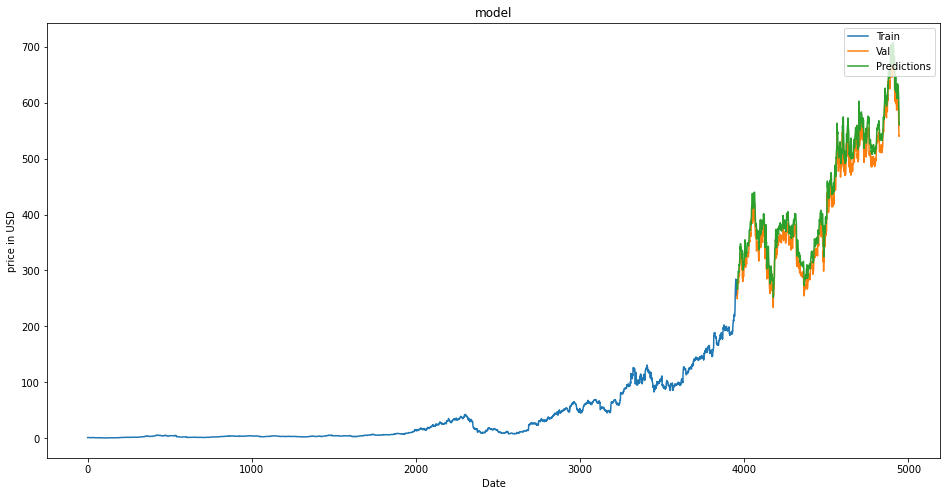

In [102]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["predictions"] = predictions
plt.figure(figsize=(16,8))
plt.title("model")
plt.xlabel("Date")
plt.ylabel("price in USD")
plt.plot(train.Close)
plt.plot(valid[["Close", "predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="upper right")
plt.show()